## Import Module

In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [19]:
print("Tensorflow Version: ", tf.__version__)

Tensorflow Version:  2.1.0


In [20]:
print("Is using GPU: ", tf.test.is_gpu_available())

Is using GPU:  True


## Load Data

In [21]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [22]:
class_name = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [23]:
print("x_train's shape: ", x_train.shape)
print("y_train's shape: ", y_train.shape)

x_train's shape:  (50000, 32, 32, 3)
y_train's shape:  (50000, 1)


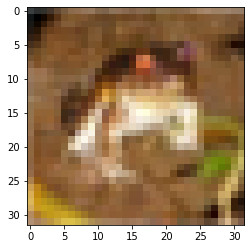

In [24]:
plt.imshow(x_train[0])

In [25]:
print(class_name[y_train[0][0]])

frog


## Process Data

In [26]:
x_train = x_train/255
x_test = x_test/255

In [27]:
y_train = tf.keras.utils.to_categorical(y=y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y=y_test, num_classes=10)

## Show Image & Class Name

In [28]:
def show_img_class(x, y, y_pred):
    
    img_idx = 0
    
    fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))
    
    for i in range(5):
        for j in range(5):
            axes[i,j].imshow(x[img_idx])
            axes[i,j].set_xticks([])
            axes[i,j].set_yticks([])
            
            if np.argmax(y[img_idx]) == np.argmax(y_pred[img_idx]):
                img_color = "green"
            else:
                img_color = "red"
                
            axes[i,j].set_title(class_name[np.argmax(y_pred[img_idx])], color=img_color, fontsize=15)
            img_idx += 1

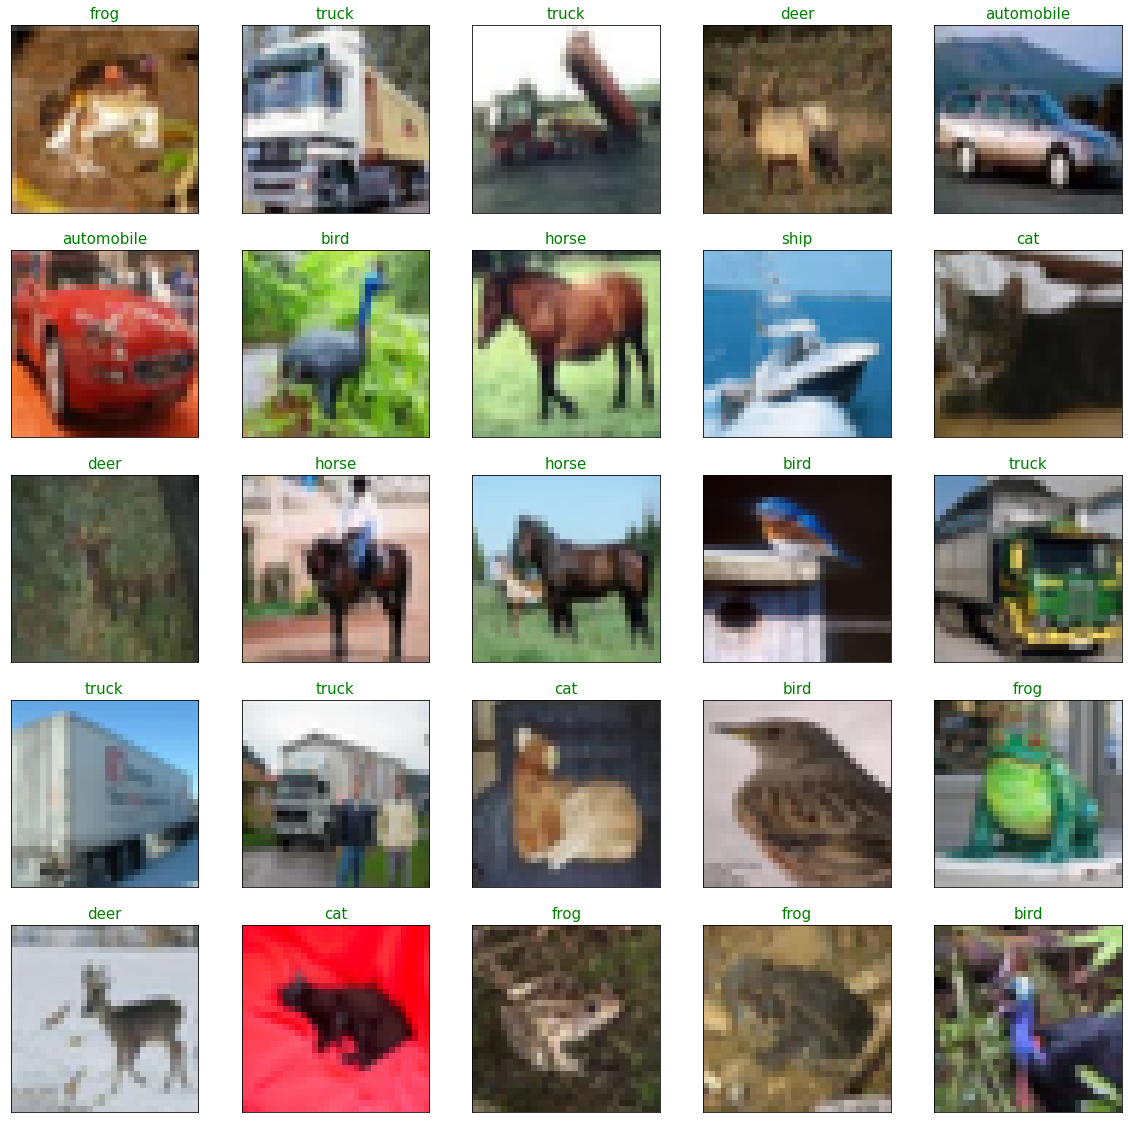

In [29]:
show_img_class(x_train[0:25], y_train[0:25], y_train[0:25])

## Create Model

In [30]:
def create_model():
    
    inputs = tf.keras.layers.Input(shape=(32, 32, 3), name="InputLayer")
    
    # convolution block
    hidden = tf.keras.layers.Conv2D(filters=10, kernel_size=3, strides=1, padding="same", activation="relu", name="ConvBlock_1_ConvLayer1")(inputs)
    hidden = tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=1, padding="same", activation="relu", name="ConvBlock_1_ConvLayer2")(hidden)
    hidden = tf.keras.layers.BatchNormalization(name="ConvBlock_1_NormLayer")(hidden)
    hidden = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu", name="ConvBlock_1_ConvLayer3")(hidden)
    hidden = tf.keras.layers.MaxPooling2D(pool_size=2, name="ConvBlock_1_MPLayer")(hidden)
    hidden = tf.keras.layers.Dropout(rate=0.5, name="ConvBlock_1_DropLayer")(hidden)
    
    # convolution block
    hidden = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation="relu", name="ConvBlock_2_ConvLayer1")(hidden)
    hidden = tf.keras.layers.Conv2D(filters=100, kernel_size=3, strides=1, padding="same", activation="relu", name="ConvBlock_2_ConvLayer2")(hidden)
    hidden = tf.keras.layers.BatchNormalization(name="ConvBlock_2_NormLayer")(hidden)
    hidden = tf.keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding="same", activation="relu", name="ConvBlock_2_ConvLayer3")(hidden)
    hidden = tf.keras.layers.MaxPooling2D(pool_size=2, name="ConvBlock_2_MPLayer")(hidden)
    hidden = tf.keras.layers.Dropout(rate=0.5, name="ConvBlock_2_DropLayer")(hidden)
    
    # convolution block
    hidden = tf.keras.layers.Conv2D(filters=256, kernel_size=3, strides=1, padding="same", activation="relu", name="ConvBlock_3_ConvLayer1")(hidden)
    hidden = tf.keras.layers.BatchNormalization(name="ConvBlock_3_NormLayer")(hidden)
    hidden = tf.keras.layers.Conv2D(filters=256, kernel_size=3, strides=1, padding="same", activation="relu", name="ConvBlock_3_ConvLayer2")(hidden)
    hidden = tf.keras.layers.MaxPooling2D(pool_size=2, name="ConvBlock_3_MPLayer")(hidden)
    hidden = tf.keras.layers.Dropout(rate=0.5, name="ConvBlock_3_DropLayer")(hidden)
    
    
    # flatten
    hidden = tf.keras.layers.Flatten(name="FlattenLayer")(hidden)
    
    # dense block
    outputs = tf.keras.layers.Dense(units=10, activation="softmax", name="OutputLayer")(hidden)
    
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
    model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])
    
    return model        

In [31]:
model = create_model()
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (InputLayer)      [(None, 32, 32, 3)]       0         
_________________________________________________________________
ConvBlock_1_ConvLayer1 (Conv (None, 32, 32, 10)        280       
_________________________________________________________________
ConvBlock_1_ConvLayer2 (Conv (None, 32, 32, 16)        1456      
_________________________________________________________________
ConvBlock_1_NormLayer (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
ConvBlock_1_ConvLayer3 (Conv (None, 32, 32, 32)        4640      
_________________________________________________________________
ConvBlock_1_MPLayer (MaxPool (None, 16, 16, 32)        0         
_________________________________________________________________
ConvBlock_1_DropLayer (Dropo (None, 16, 16, 32)        0   

## Train Model

In [32]:
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=20, verbose=1)

Train on 50000 samples
Epoch 1/20
50000/50000 [==============================] - 32s 635us/sample - loss: 1.6850 - accuracy: 0.4349:02 - loss: 3.4625 - accura - ETA: 52s - loss: 3.2855 - accuracy: 0.2 - ETA: 50s - loss: 3.2325 - accuracy: 0.208 - ETA: 49s - lo - ETA: 36s - loss: 2.8196 - - - ETA: 26s - loss:  - ETA: 23s - loss: 2. - ETA: 21s - loss: 2.1261 - accuracy - ETA: 20s - loss: 2.1000 - accuracy: 0.3 - ETA: 20s - loss: 2.0911 - accuracy: 0  - ETA: 16s - loss: 1.9730 - accuracy: 0.365 - ETA: 16s - loss: 1.9720 - accuracy:  - ETA: 15s - loss: 1.9582 - accuracy: - ETA: 15s - loss: 1.9456 - accura - ETA - ETA: 1s
Epoch 2/20
50000/50000 [==============================] - 30s 591us/sample - loss: 1.2065 - accuracy: 0.57709s - loss: 1.2628 - accuracy: 0 - ETA: 28s - loss: 1.2794 - accuracy: 0 - ETA: 28s - loss: 1.3111 - accuracy: 0.535 - ETA: 28s - loss: 1.3080 - accuracy: 0.536 - ETA: 28s - loss: 1.3128 - accuracy: 0 - ETA: 28s - loss: 1.3162 - accu - ETA: 27 - ETA: 24 - ETA: 22s - l

50000/50000 [==============================] - 30s 592us/sample - loss: 0.6586 - accuracy: 0.77239s - loss: 0.6521  - ETA: 27s - loss: 0.6381 - accu - ETA: 27s - loss: 0.6472 - accuracy: 0.7 - ETA: 26s - loss: 0.6455 - accuracy:  - E - ETA: 17s - loss: 0.6523 - accura -  - ETA: 11s - loss: 0.6519 - accuracy: - ETA: 11s - loss: 0.6530 - accuracy: 0. - ETA: 10s - loss: 0.6521 - accuracy: 0 - ETA: 10s - loss: 0.6523 - accuracy: 0.77 - ETA: 10s - loss: 0.6524 - accuracy: - ETA: 9s - loss: 0.6530 - accuracy: 0.77 - - ETA: 3s - loss: 0.657 - ETA: 3s - l - ETA: 2s - l -
Epoch 12/20
50000/50000 [==============================] - 30s 592us/sample - loss: 0.6298 - accuracy: 0.78238s - loss: 0. - ETA: 26s - loss: 0.6024 - accuracy - ETA: 26s - loss: 0.5934 - accuracy: 0 - ETA: 25s - loss - ETA: 23s - loss - ETA: 22s - loss: 0.6018 - - ETA: 2 - ETA: 5s - loss: 0.6235 - accuracy: 0. - ETA: 5s - loss: 0 - ETA: 0s - loss: 0.6291 - accuracy
Epoch 13/20
50000/50000 [==============================] - 30

## Predict

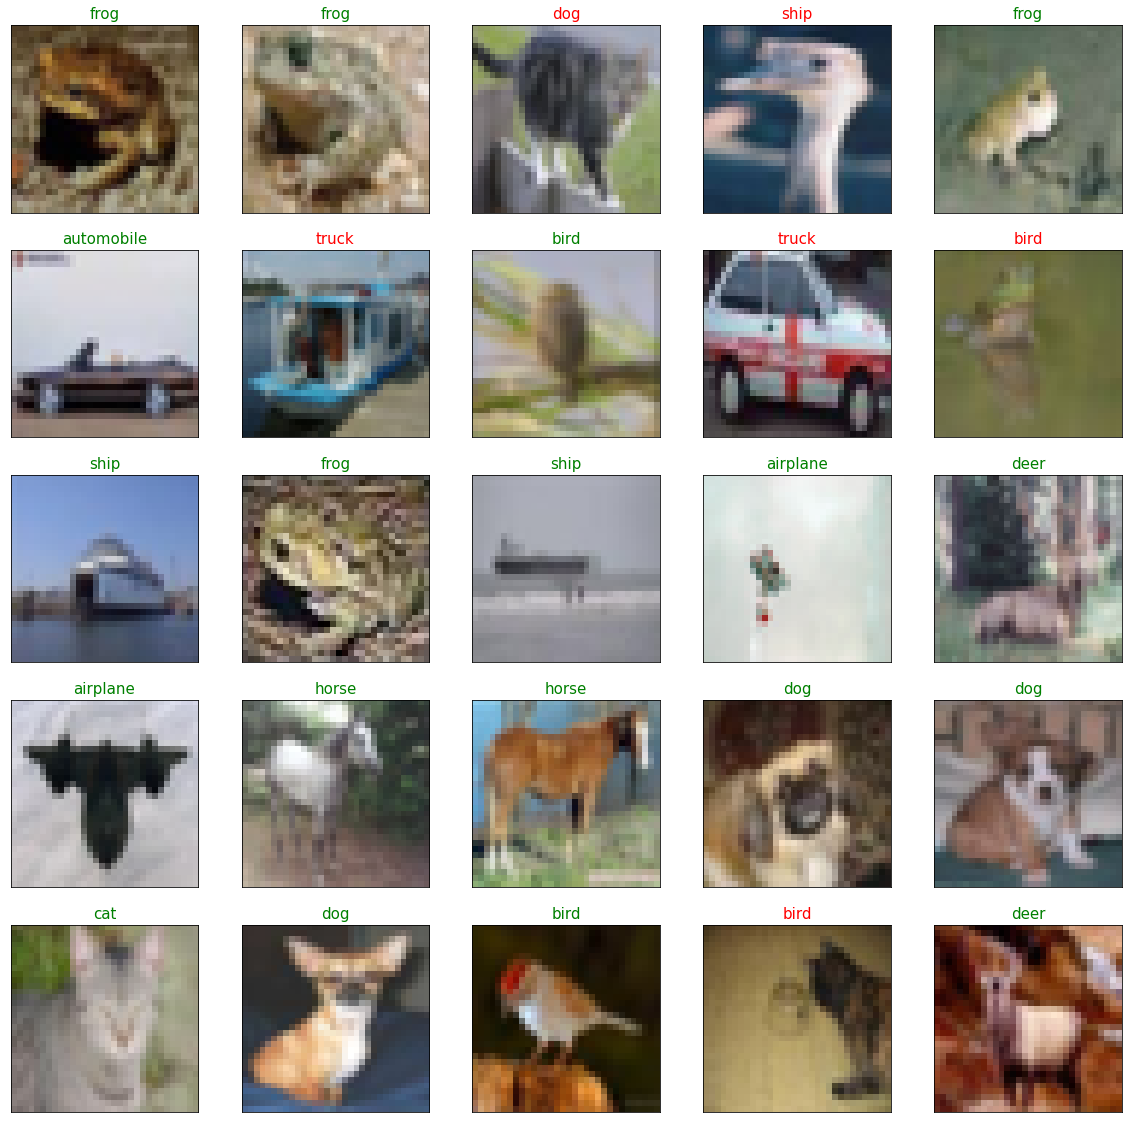

In [33]:
show_img_class(x_test[300:325], y_test[300:325], model.predict(x=x_test[300:325]))

In [34]:
model.evaluate(x=x_test, y=y_test)

10000/10000 [==============================] - 3s 253us/sample - loss: 0.5544 - accuracy: 0.8258


[0.554435044336319, 0.8258]